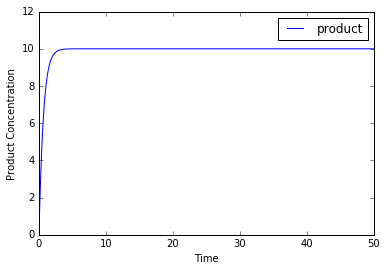

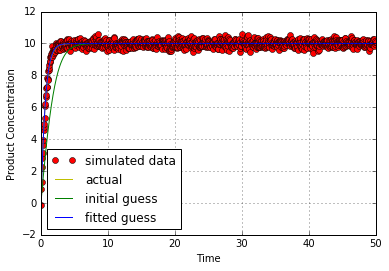

(100, 60, 10)
[ 72.61230621  41.57170465  10.00249219]


In [1]:
# This doesn't seem right. This isn't how MM is calculated!? Also why is starting substrate an estimated parameter?!?!?
# Do not use

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
  
def michelis_menten(y, t, *args):
    Vmax = args[0]
    km = args[1]
    StartingSubstrate = args[2]
    P = y[0]
    CurrentSubstrate = StartingSubstrate - P
     
    dP = Vmax * (CurrentSubstrate / (CurrentSubstrate + km))
    return dP
 
# Parameters MM
Vmax = 100
km = 60
StartingSubstrate = 10
params = (Vmax, km, StartingSubstrate)
 
# Initial Conditions MM
init_P = 0
  
# Timesteps
n_steps = 1000
t = np.linspace(0, 50, n_steps)
  
num_P = odeint(michelis_menten, init_P, t, args = (params)).flatten()
 
plt.plot(t, num_P, c='b', label = 'product')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.legend(loc = 'best')
plt.show()


exp_P = num_P + np.random.randn(len(num_P)) * 0.2
# Create experimental data.  Just take the regular simulation data and add some gaussian noise to it.


def residuals(p):
    p = tuple(p)
    sim_P = odeint(michelis_menten, init_P, t, args = p).flatten()
    res = sim_P - exp_P
    return res.flatten()

from scipy.optimize import leastsq
initial_guess = [10, 10, 10]
fitted_params = leastsq(residuals, initial_guess)[0]

plt.plot(t, exp_P, 'ro',   label='simulated data')
plt.plot(t, odeint(michelis_menten, init_P, t, args = tuple(params)), 'y-',  label='actual')
plt.plot(t, odeint(michelis_menten, init_P, t, args = tuple(initial_guess)), 'g-',  label='initial guess')
plt.plot(t, odeint(michelis_menten, init_P, t, args = tuple(fitted_params)), 'b-',  label='fitted guess')
plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Product Concentration')
plt.grid()
plt.show()

print(params)
print(fitted_params)